<a href="https://colab.research.google.com/github/Aditisharma92001/Analysis-on-Meterological-Data/blob/main/Analysis_on_meteorological_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/martandsingh/datasets/master/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# checking if any null values exists


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [ ]:
df.isna().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [ ]:
# We can remove many columns as they don't have much effect on our dataset

In [ ]:
df_col = ['Formatted Date','Apparent Temperature (C)','Humidity']
df=df[df_col]
df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


# Coverting "Formatted Date" column into datetime format

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  datetime64[ns, UTC]
 1   Apparent Temperature (C)  96453 non-null  float64            
 2   Humidity                  96453 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 2.2 MB


In [ ]:
df = df.set_index(['Formatted Date'])

# Resample the data 

In [ ]:
df_resample = df[['Apparent Temperature (C)', 'Humidity']].resample("MS").mean()

In [ ]:
df_resample.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


In [ ]:
df_resample.describe()

,Apparent Temperature (C),Humidity
count,133.000000,133.000000
mean,10.689657,0.736422
std,9.178501,0.101570
min,-8.817241,0.491250
25%,1.969780,0.669328
50%,11.782770,0.735309
75%,19.526790,0.823965
max,24.525343,0.925390


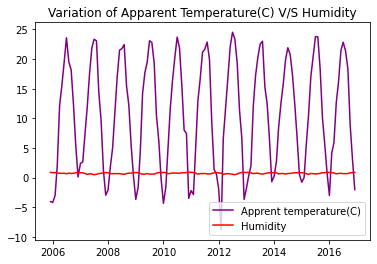

In [ ]:
plt.plot(df_resample['Apparent Temperature (C)'],label="Apprent temperature(C)",color='purple')
plt.plot(df_resample['Humidity'],label="Humidity",color='Red')
plt.title("Variation of Apparent Temperature(C) V/S Humidity")
plt.legend()

We can observe that there is not much variation in humidity, while there are a lot of ups and downs in the Avg. temp

# Correlation between Apparent temperature & Humidity using regplot

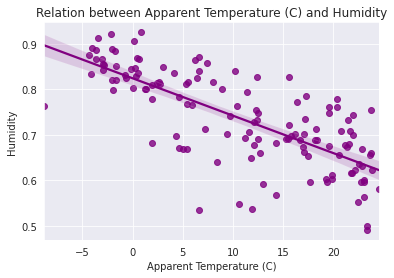

In [ ]:
sn.regplot(data=df_resample,x='Apparent Temperature (C)',y='Humidity',color="purple")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

we can see there is a linear relation btw temp and humidity with a negetive slope


# Correlation between Apparent temperature & Humidity

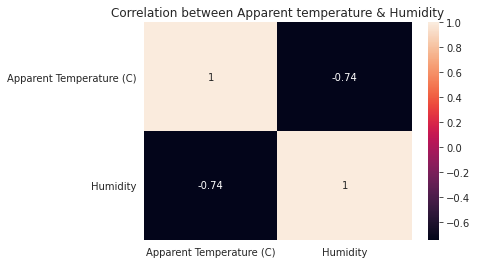

In [ ]:
plt.title("Correlation between Apparent temperature & Humidity")
sn.heatmap(data= df_resample.corr(), annot=True)
plt.show()

In [ ]:
# plot graph btw humidity and avg temp to understand their variation in all 12 months. we will analyse it with 10 years of data.

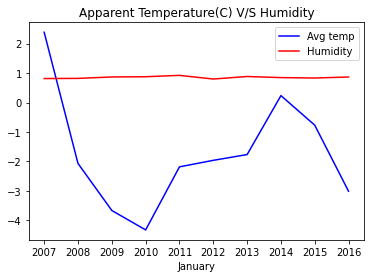

In [ ]:
jan = df_resample[df_resample.index.month==1]
plt.plot(jan.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(jan.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("January")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

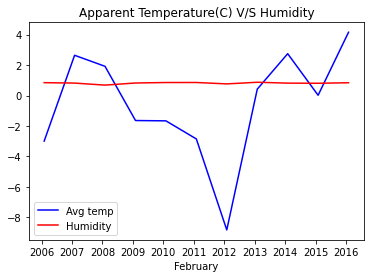

In [ ]:
feb = df_resample[df_resample.index.month==2]
plt.plot(feb.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(feb.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("February")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

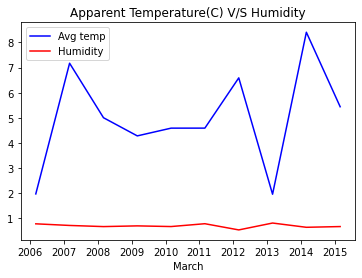

In [ ]:
march = df_resample[df_resample.index.month==3]
plt.plot(march.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(march.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("March")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

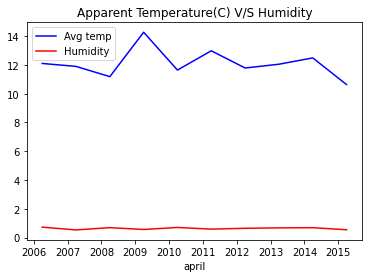

In [ ]:
april = df_resample[df_resample.index.month==4]
plt.plot(april.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(april.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("april")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

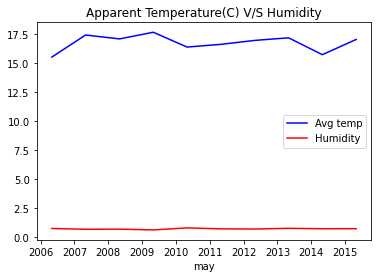

In [ ]:
may = df_resample[df_resample.index.month==5]
plt.plot(may.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(may.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("may")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

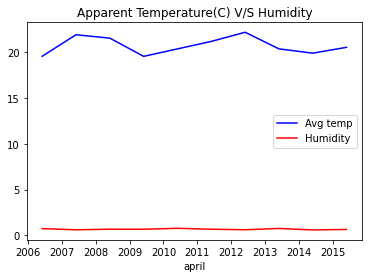

In [ ]:
june = df_resample[df_resample.index.month==6]
plt.plot(june.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(june.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("april")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

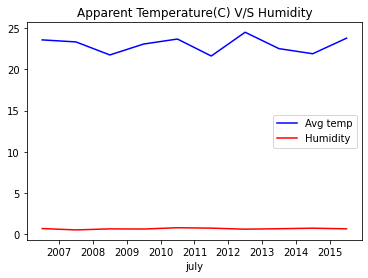

In [ ]:
july = df_resample[df_resample.index.month==7]
plt.plot(july.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(july.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("july")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

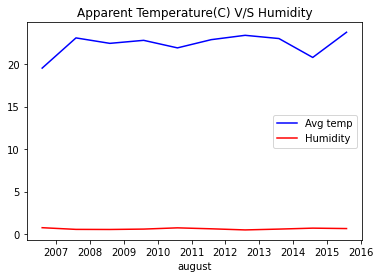

In [ ]:
august = df_resample[df_resample.index.month==8]
plt.plot(august.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(august.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("august")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

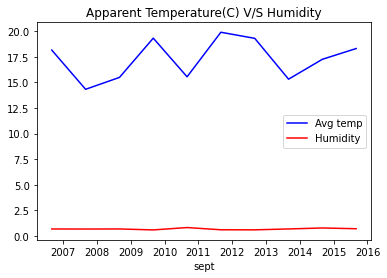

In [ ]:
sept = df_resample[df_resample.index.month==9]
plt.plot(sept.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(sept.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("sept")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

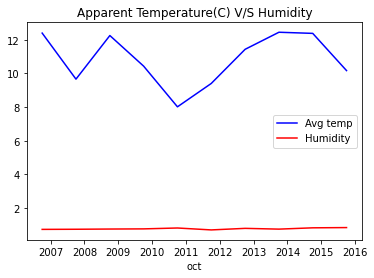

In [ ]:
oct = df_resample[df_resample.index.month==10]
plt.plot(oct.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(oct.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("oct")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

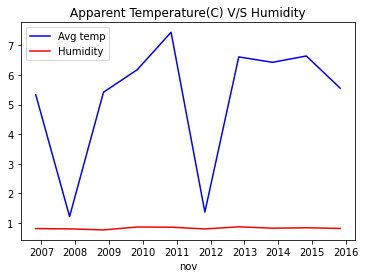

In [ ]:
nov = df_resample[df_resample.index.month==11]
plt.plot(nov.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(nov.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("nov")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

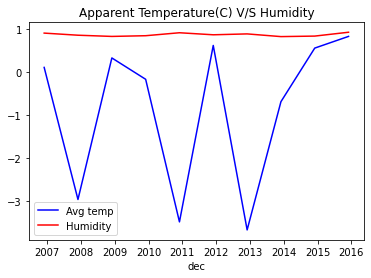

In [ ]:
dec = df_resample[df_resample.index.month==12]
plt.plot(dec.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'],label='Avg temp',color='blue')
plt.plot(dec.loc['2006-02-01':'2016-02-01','Humidity'],label='Humidity',color='red')
plt.xlabel("dec")
plt.title("Apparent Temperature(C) V/S Humidity")
plt.legend()

In [ ]:
# Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability 
# also taking humidity into consideration we can say that it has almost remained the same throughout the past years.